# Objective: To predict Insurance fraud.

In this task we need to predict Insurance Fraud on the basis of other variables present in dataset like age, policy number, etc.

* Target variable is fraud reported in dataset

#### Importing various libraries necessary for the task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud = pd.read_csv('./Downloads/Automobile_insurance_fraud.csv')

In [3]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### Checking for dimensions, descriptions and pressence of null values in dataset.

In [4]:
fraud.shape

(1000, 40)

In [5]:
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

From above we can conclude this about dataset : 

* dataset contains 1000 rows & 40 columns
* description gives mean, min value, max value, etc of every column of dataset which contains continuous dataset.
* There is pressence of null values in only one column and that column only contains null values in it. So we can drop it.

In [7]:
fraud.drop(['_c39'], axis= 1, inplace= True)

#### EDA

1. months_as_customer

In [8]:
fraud['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

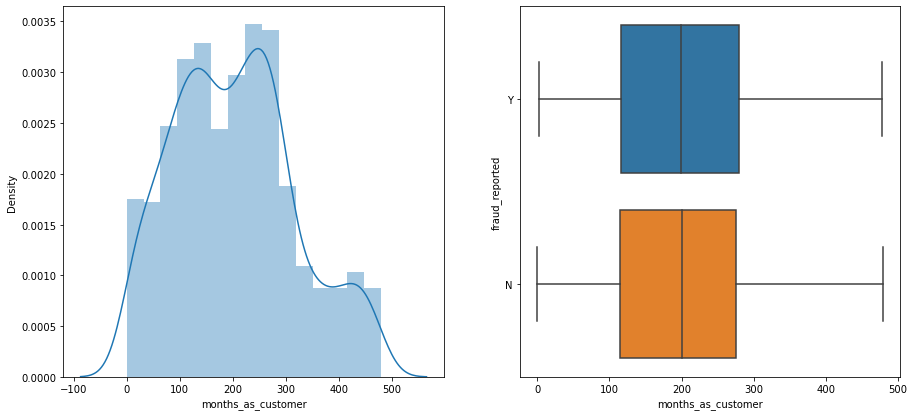

In [9]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['months_as_customer'])
plt.xlabel('months_as_customer')
plt.subplot(222)
sns.boxplot(x= 'months_as_customer', y= 'fraud_reported', data= fraud)
plt.xlabel('months_as_customer')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of months_as_customer we conclude that data is somewhat positively skewed with having highest density at around 280 from distplot and from boxplot we conclude that no outliers of months_as_customer are present in both categories of fraud_reported.

2. age

In [10]:
fraud['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

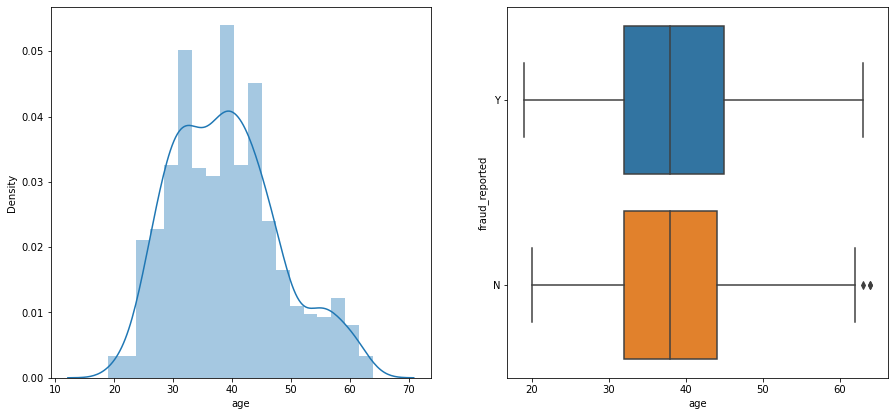

In [11]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['age'])
plt.xlabel('age')
plt.subplot(222)
sns.boxplot(x= 'age', y= 'fraud_reported', data= fraud)
plt.xlabel('age')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of age we conclude that data is postively skewed with having highest density at around 42 from distplot and from boxplot we conclude that outliers of age are present in only N category of fraud_reported.

3. policy_number

In [12]:
fraud['policy_number'].unique()

array([521585, 342868, 687698, 227811, 367455, 104594, 413978, 429027,
       485665, 636550, 543610, 214618, 842643, 626808, 644081, 892874,
       558938, 275265, 921202, 143972, 183430, 431876, 285496, 115399,
       736882, 699044, 863236, 608513, 914088, 596785, 908616, 666333,
       336614, 584859, 990493, 129872, 200152, 933293, 485664, 982871,
       206213, 616337, 448961, 790442, 108844, 430029, 529112, 939631,
       866931, 582011, 691189, 537546, 394975, 729634, 282195, 420810,
       524836, 307195, 623648, 485372, 598554, 303987, 343161, 519312,
       132902, 332867, 356590, 346002, 500533, 348209, 486676, 260845,
       657045, 761189, 175177, 116700, 166264, 527945, 627540, 279422,
       484200, 645258, 694662, 960680, 498140, 498875, 798177, 614763,
       679370, 958857, 686816, 127754, 918629, 731450, 307447, 992145,
       900628, 235220, 740019, 246882, 797613, 193442, 389238, 760179,
       939905, 872814, 632627, 283414, 163161, 853360, 776860, 149367,
      

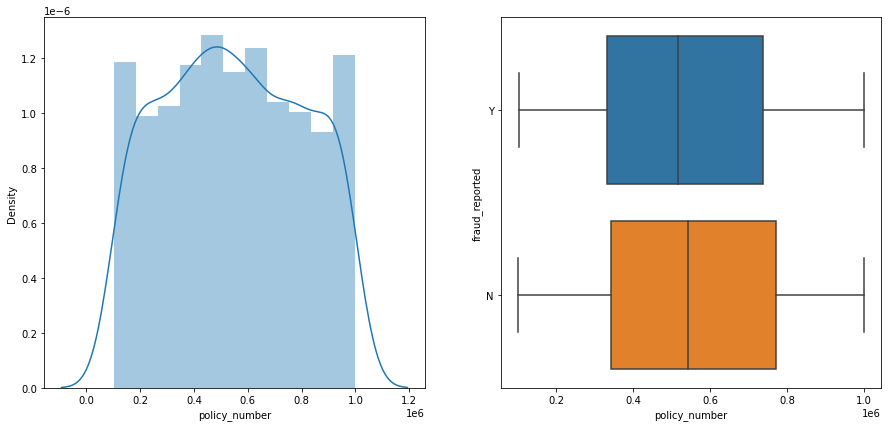

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['policy_number'])
plt.xlabel('policy_number')
plt.subplot(222)
sns.boxplot(x= 'policy_number', y= 'fraud_reported', data= fraud)
plt.xlabel('policy_number')
plt.ylabel('fraud_reported')
plt.show()

by looking at both graphs of policy_number we conclude that we cannot determine the skewness of data but data is having highest density at around 500000 from distplot and from boxplot we conclude that no outliers of policy_number are present in both categories fraud_reported.

4. Policy_bind_date

In [14]:
fraud['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

We can extract year information to make it more useful

In [15]:
ab = []
for i in fraud['policy_bind_date']:
    i = i[-4:]
    ab.append(i)

In [16]:
fraud['policy_bind_date'] = pd.Series(ab)

In [17]:
fraud['policy_bind_date'] = pd.to_numeric(fraud['policy_bind_date'])

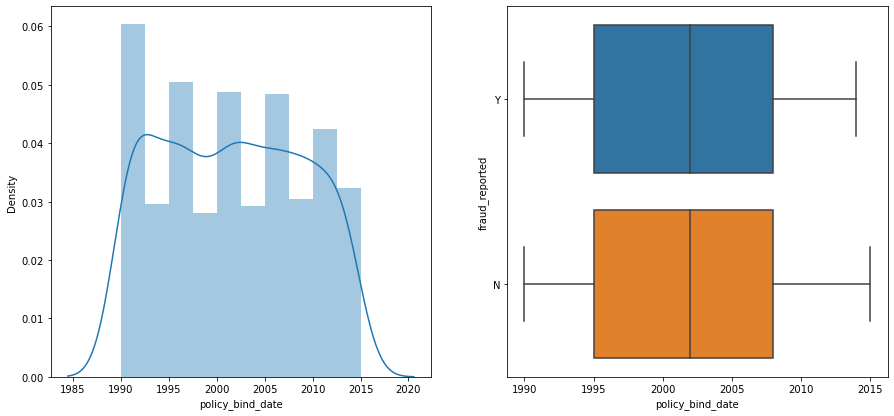

In [18]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['policy_bind_date'])
plt.xlabel('policy_bind_date')
plt.subplot(222)
sns.boxplot(x= 'policy_bind_date', y= 'fraud_reported', data= fraud)
plt.xlabel('policy_bind_date')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of policy_bind_date we conclude taht we cannot determine the skewness of data but data is having highest density at around 1990 year from distplot and from boxplot we conclude that no outliers of policy_bind-date are present in any categories of fraud_reported.

5. policy_state

In [19]:
fraud['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

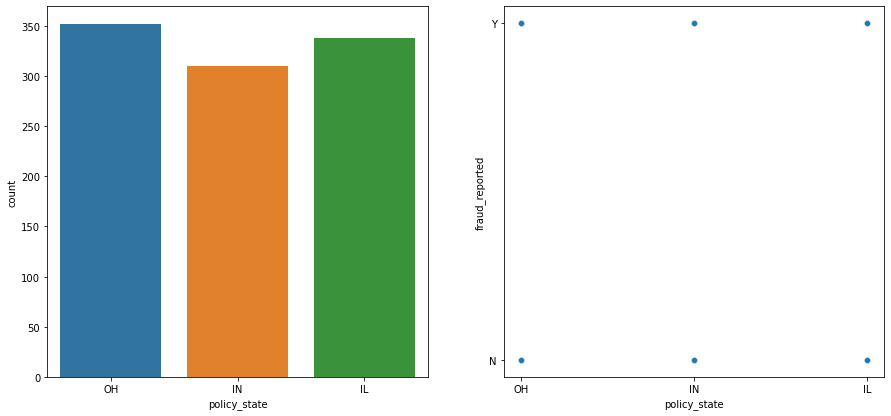

In [20]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['policy_state'])
plt.xlabel('policy_state')
plt.subplot(222)
sns.scatterplot(x= 'policy_state', y= 'fraud_reported', data= fraud)
plt.xlabel('policy_state')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of policy_state we conclude that most policy_state is OH from countplot and from scatterplot we conclude that every category of policy_state is present in both categories of fraud_reported.

6. policy_csl

In [21]:
fraud['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

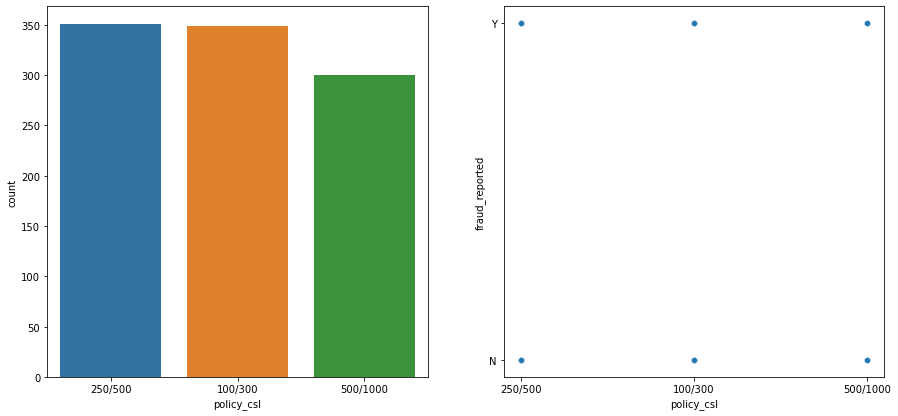

In [22]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['policy_csl'])
plt.xlabel('policy_csl')
plt.subplot(222)
sns.scatterplot(x= 'policy_csl', y= 'fraud_reported', data= fraud)
plt.xlabel('policy_csl')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of policy_csl we conclude that most policy_csl is present in 250/500 category from countplot and from scatterplot we conclude that every category of policy_csl is present in both categories of fraud_reported.

7. policy_deductible

In [23]:
fraud['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

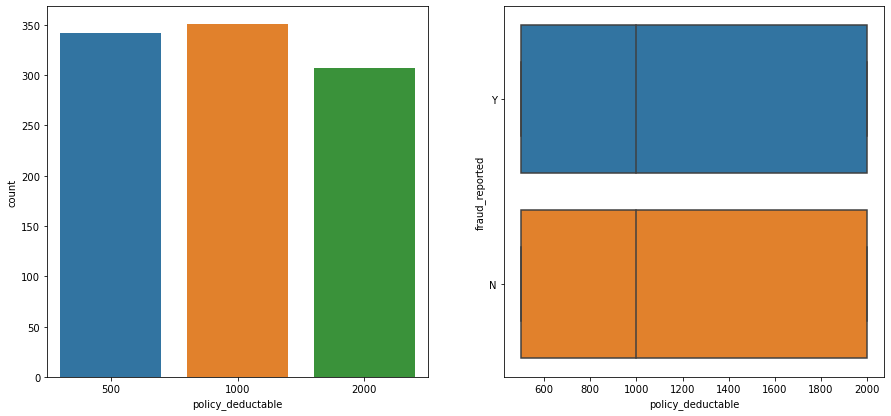

In [24]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['policy_deductable'])
plt.xlabel('policy_deductable')
plt.subplot(222)
sns.boxplot(x= 'policy_deductable', y= 'fraud_reported', data= fraud)
plt.xlabel('policy_deductable')
plt.ylabel('fraud_reported')
plt.show()

by looking at both graphs of policy_deductable we conclude that most amount from policy that was deductable was 1000 from countplot and from boxplot we conclude that no outliers of policy_deductable are present in any categories of fraud_reported.

8. policy_annual_premium

In [25]:
fraud['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

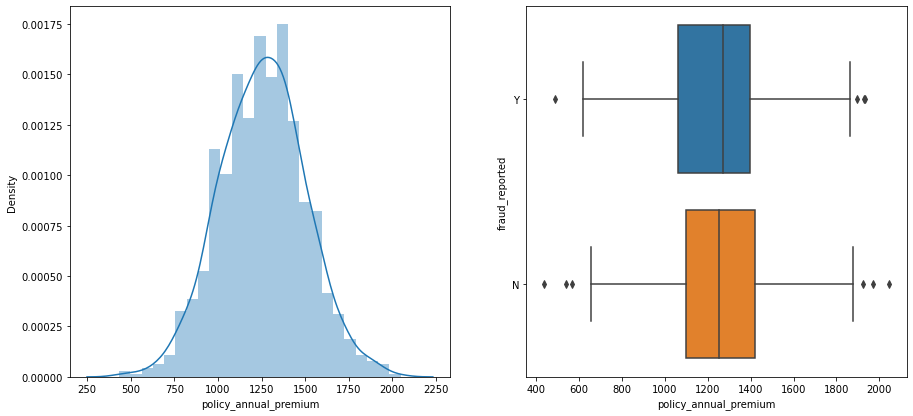

In [26]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['policy_annual_premium'])
plt.xlabel('policy_annual_premium')
plt.subplot(222)
sns.boxplot(x= 'policy_annual_premium', y= 'fraud_reported', data= fraud)
plt.xlabel('policy_annual_premium')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of policy_annual_premium we conclude that we cannot determine skewness of data but data is having highest density at around 1400 from distplot and from boxplot we conclude that outliers of policy_annual_premium are present in both categories of fraud_reported.

9. umbrella_limit

In [27]:
fraud['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

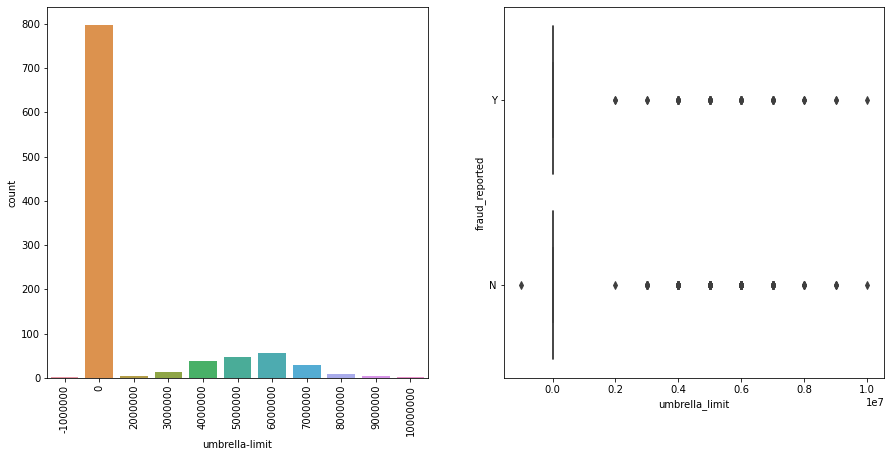

In [28]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['umbrella_limit'])
plt.xlabel('umbrella-limit')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'umbrella_limit', y= 'fraud_reported', data= fraud)
plt.xlabel('umbrella_limit')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of umbrella_limit we conclude that most number of umbrella_limit is at 0 category from countplot and from boxplot we conclude that outliers of umbrella_limit are present in both categories of fraud_reported.

10. insured_zip

In [29]:
fraud['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

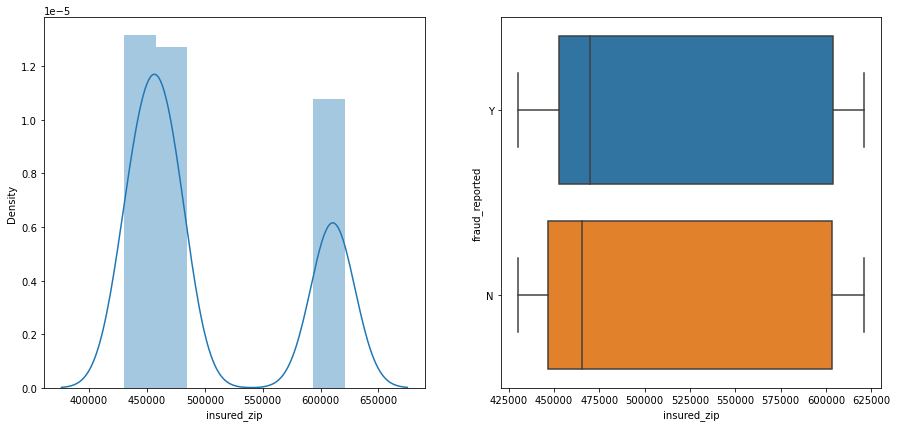

In [30]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['insured_zip'])
plt.xlabel('insured_zip')
plt.subplot(222)
sns.boxplot(x= 'insured_zip', y= 'fraud_reported', data= fraud)
plt.xlabel('insured_zip')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of insured_zip we conclude that we cannot determine skewness but data having highest density at around 420000 from distplot and from boxplot we conclude that no outliers of insured_zip are present inany categories of fraud_reported.

11. insured_sex

In [31]:
fraud['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

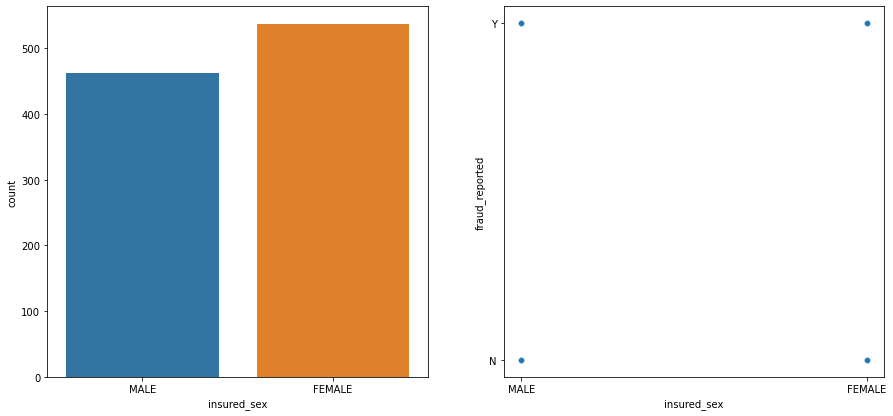

In [32]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['insured_sex'])
plt.xlabel('insured_sex')
plt.subplot(222)
sns.scatterplot(x= 'insured_sex', y= 'fraud_reported', data= fraud)
plt.xlabel('insured_sex')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of insured_sex we conclude that most policy are taken by female from countplot and from scatterplot we conclude that both category of insured_zip are present in both categories of fraud_reported

12. insured_education_level

In [33]:
fraud['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

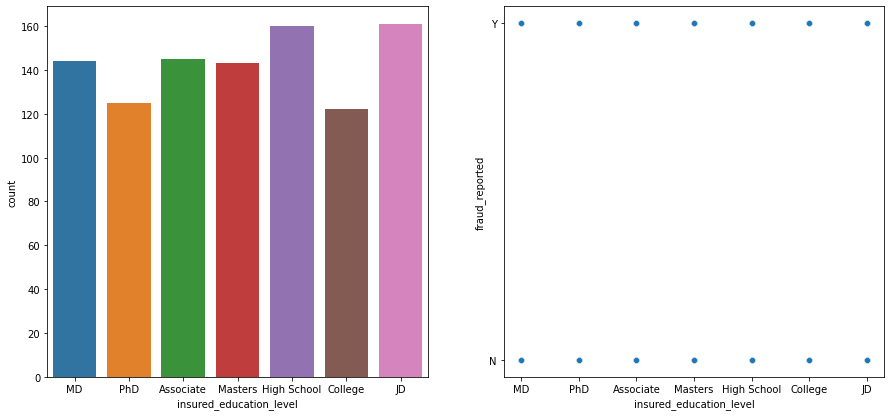

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['insured_education_level'])
plt.xlabel('insured_education_level')
plt.subplot(222)
sns.scatterplot(x= 'insured_education_level', y= 'fraud_reported', data= fraud)
plt.xlabel('insured_education_level')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of insured_education_level we conclude that mostinsured_education_level is JD category from countplot and from scatterplot we conclude that every category of insured_education_level is present in both categories of fraud_reported

13. insured_occupation

In [35]:
fraud['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

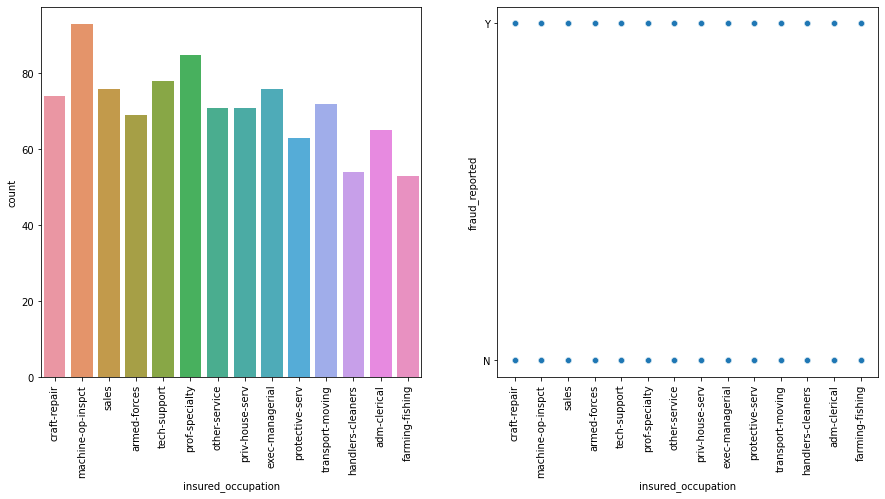

In [36]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['insured_occupation'])
plt.xlabel('insured_occupation')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'insured_occupation', y= 'fraud_reported', data= fraud)
plt.xlabel('insured_occupation')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of insured_occupation we conclude that most persons have machine-op-inspct as their occupation from countplot and from scatterplot we conclude that every category of insured_occupation is present in both categories of fraud_reported.

14. insured_hobbies

In [37]:
fraud['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

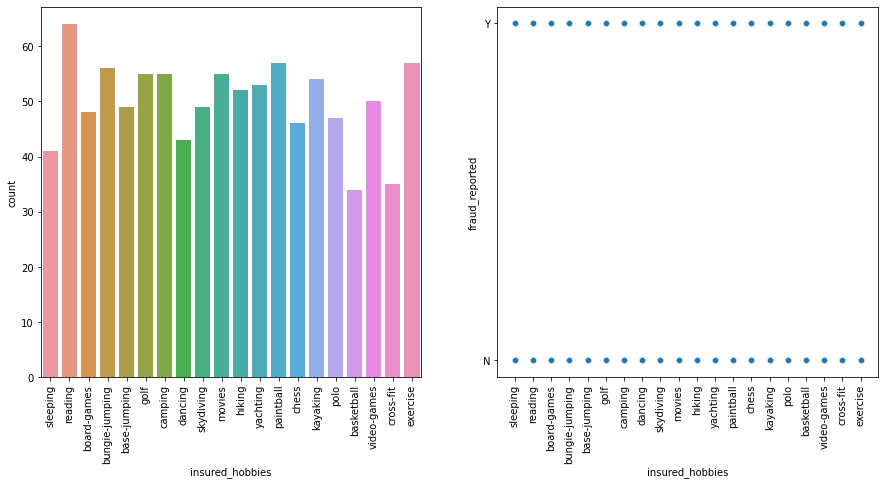

In [38]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['insured_hobbies'])
plt.xlabel('insured_hobbies')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'insured_hobbies', y= 'fraud_reported', data= fraud)
plt.xlabel('insured_hobbies')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of insured_hobbies we conclude most people have reading as their hobbies from countplot and from scatterplot we conclude that every category of insured_hobbies are present in both categories of fraud_reported

15. insured_relationship

In [39]:
fraud['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

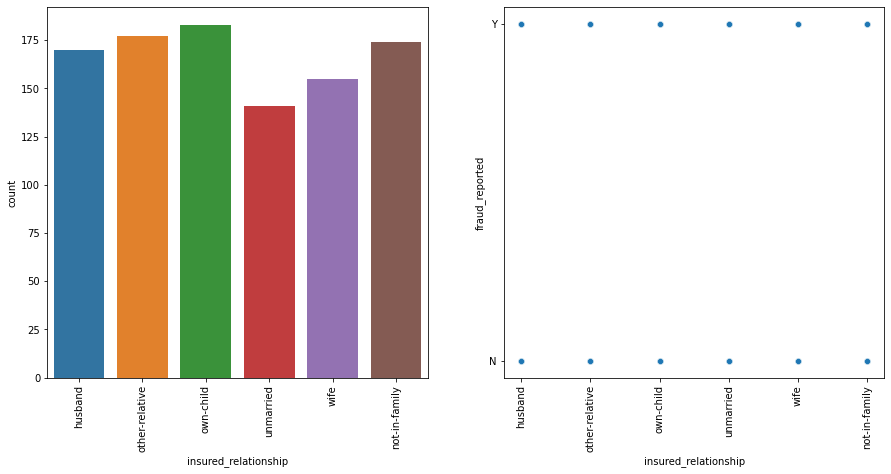

In [40]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['insured_relationship'])
plt.xlabel('insured_relationship')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'insured_relationship', y= 'fraud_reported', data= fraud)
plt.xlabel('insured_relationship')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of insured_relationship we conclude that most people have own_child relationship from countplot and from scatterplot we conlude that every category of relationship are present in both categories of fraud_reported

16. capital_gains

In [41]:
fraud['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

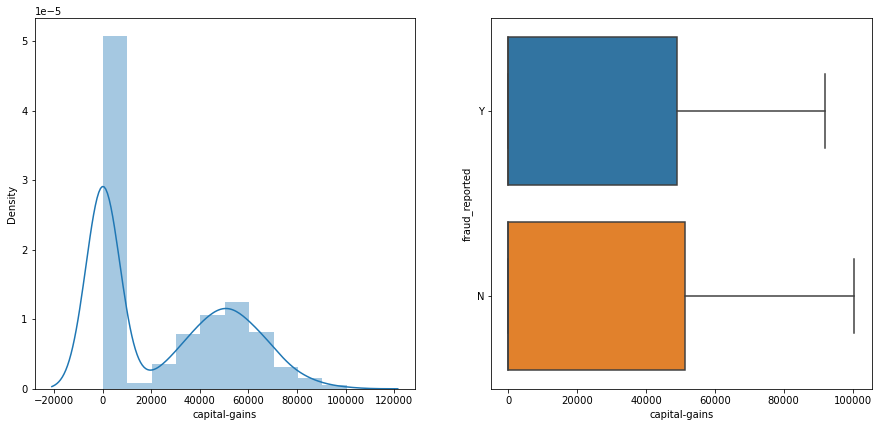

In [42]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['capital-gains'])
plt.xlabel('capital-gains')
plt.subplot(222)
sns.boxplot(x= 'capital-gains', y= 'fraud_reported', data= fraud)
plt.xlabel('capital-gains')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of capital-gains we conclude that data is showing somewhat positive skewness with having highest density at around 0 from distplot and from boxplot we conclude that no outliers of capital-gains are present in any categories of fraud_reported.

17. capital-loss

In [43]:
fraud['capital-loss'].unique()

array([      0,  -62400,  -46000,  -77000,  -39300,  -51000,  -32800,
        -55500,  -37800,  -27300,  -68200,  -31000,  -53500,  -29200,
        -30200,  -55600,  -64000,  -49200,  -55700,  -24100,  -67400,
        -60200,  -28700,  -40300,  -46500,  -39600,  -55000,  -45800,
        -58500,  -49500,  -49000,  -91200,  -66200,  -51500,  -50000,
        -50300,  -42900,  -19700,  -45000,  -40600,  -80600,  -44200,
        -78600,  -56100,  -20800,  -58400,  -71700,  -72300,  -31700,
        -58100,  -24300,  -56400,  -57000,  -47500,  -38800,  -41000,
        -56800,  -63100,  -36200,  -53700,  -69700,  -32100,  -47300,
        -54800,  -45200,  -65600,  -20400,  -77500,  -43200,  -56200,
        -57900,  -57100,  -38200,  -44600,  -44500,  -66900,  -82400,
        -54000,  -59100,  -59300,  -31400,  -26900,  -51100,  -59900,
        -88300,  -41300,  -45100,  -58900,  -22300,  -30300,  -51300,
        -57700,  -39200,  -67900,  -57500,  -90200,  -13800,  -34400,
        -36700,  -39

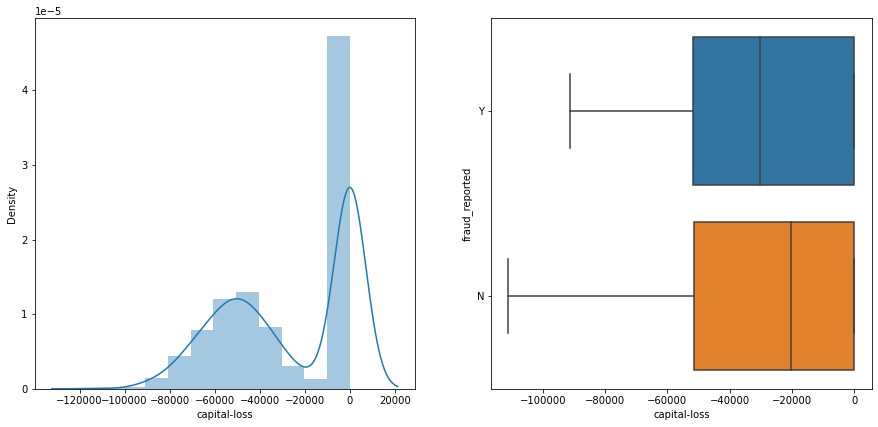

In [44]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['capital-loss'])
plt.xlabel('capital-loss')
plt.subplot(222)
sns.boxplot(x= 'capital-loss', y= 'fraud_reported', data= fraud)
plt.xlabel('capital-loss')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of capital-loss we conclude that data is showing somewhat negative skewness with data having highest density at around 0 from distplot and from boxplot we conclude no outliers of capital-loss are present in any category of fraud_reported.

18. incident_date

In [45]:
fraud['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

As year is same in whole column so we can extract date only from this column to make information more useful

In [46]:
ab = []
for i in fraud['incident_date']:
    i = i[:2]
    ab.append(i)

In [47]:
fraud['incident_date'] = pd.Series(ab)

In [48]:
fraud['incident_date'] = pd.to_numeric(fraud['incident_date'])

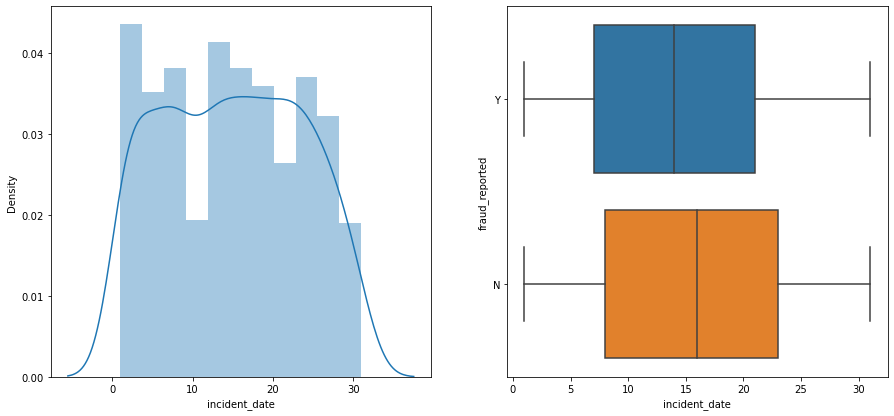

In [49]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['incident_date'])
plt.xlabel('incident_date')
plt.subplot(222)
sns.boxplot(x= 'incident_date', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_date')
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of incident_date we conclude that we cannot determine skewness of data but data having highest density at around 2 from distplot and from boxplot we conclude that no outliers of incident_date are present in any category of fraud_reported.

19. incident_type

In [50]:
fraud['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

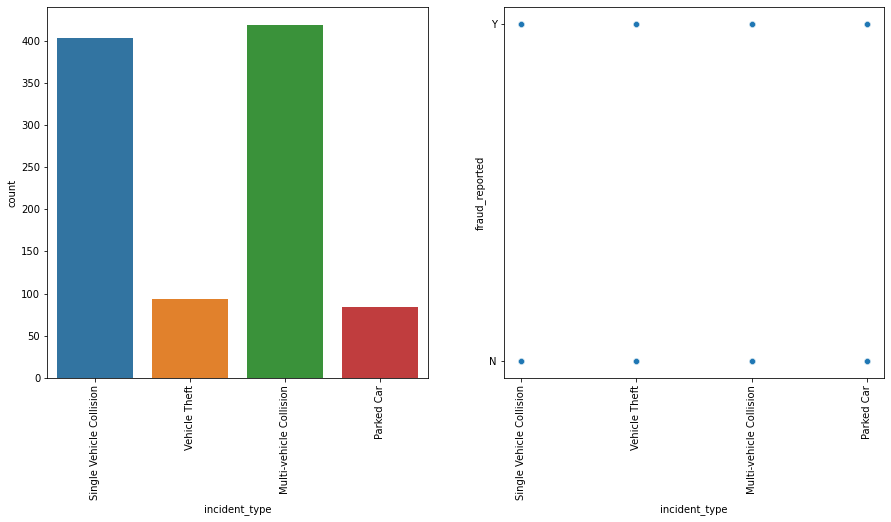

In [51]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['incident_type'])
plt.xlabel('incident_type')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'incident_type', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_type')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of incident_type we conclude that most incident were of multi-vehicle Collision from countplot and from scatterplot we conclude that every category of incident_type is present in both categories of fraud_reported.

20. collision_type

In [52]:
fraud['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [53]:
fraud['collision_type'] = fraud['collision_type'].replace(['?'], [np.nan])

In [54]:
fraud['collision_type'] = fraud['collision_type'].fillna(method= 'bfill')

In [55]:
fraud['collision_type'].isnull().sum()

1

In [56]:
fraud['collision_type'] = fraud['collision_type'].fillna(method= 'ffill')

In [57]:
fraud['collision_type'].isnull().sum()

0

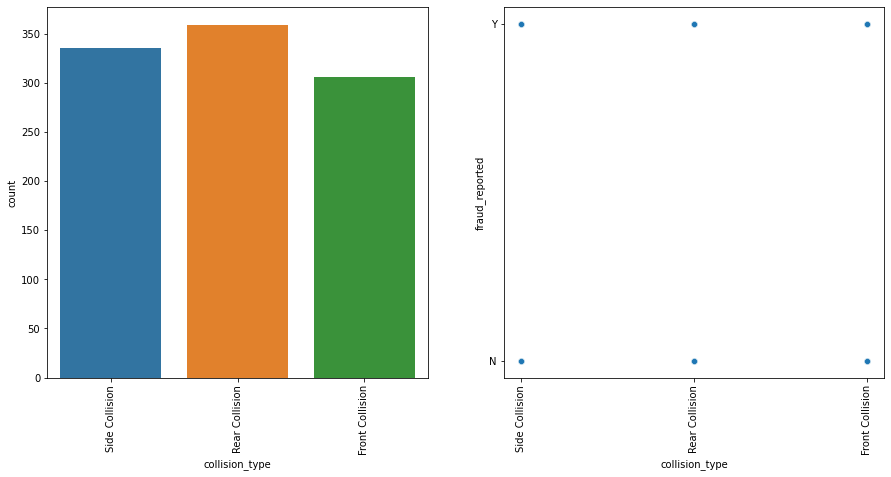

In [58]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['collision_type'])
plt.xlabel('collision_type')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'collision_type', y= 'fraud_reported', data= fraud)
plt.xlabel('collision_type')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of collision_type we conclude that most type of collisions are of Rear type from countplot and from scatterplot we conclude that every category collision_type are present in both categories of fraud_reported.

21. incident_severity

In [59]:
fraud['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

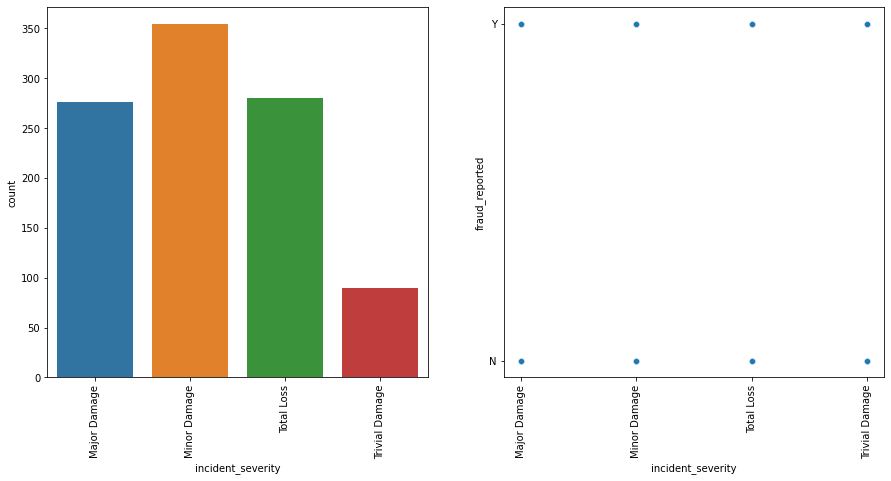

In [60]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['incident_severity'])
plt.xlabel('incident_severity')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'incident_severity', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_severity')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of incident_severity we conclude that most people have minor damage from countplot and from scatterplot we conclude that every category of incident_severity are present in both categories of fraud_reported.

22. authorities_contacted

In [61]:
fraud['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

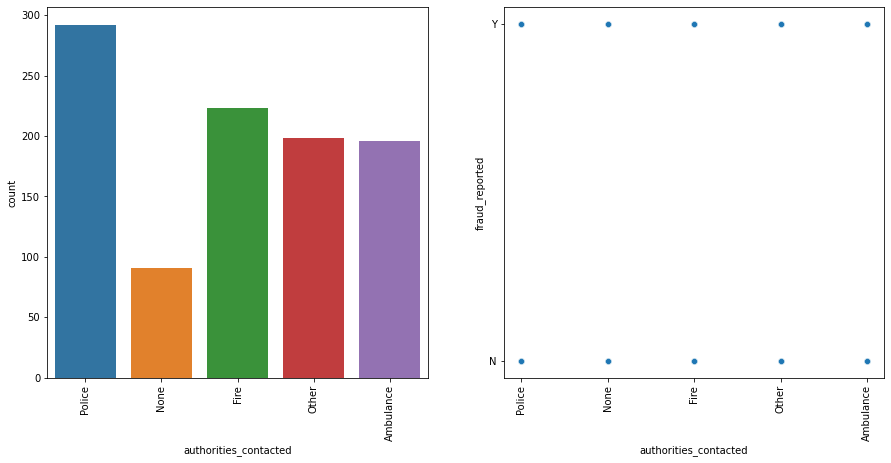

In [62]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['authorities_contacted'])
plt.xlabel('authorities_contacted')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'authorities_contacted', y= 'fraud_reported', data= fraud)
plt.xlabel('authorities_contacted')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of authorities_contacted we conclude that most people contacted Police from countplot and from scatterplot we conclude that every category of authorities_contacted are present in both categories of fraud_reported.

23. incident_state

In [63]:
fraud['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

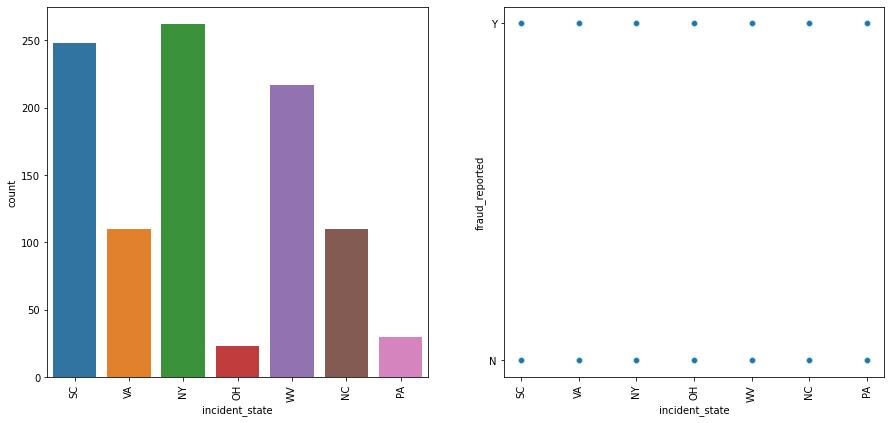

In [64]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['incident_state'])
plt.xlabel('incident_state')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'incident_state', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_state')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of incident_state we conclude that most incident occured in NY state from countplot and from scatterplot we conclude that every category of incident_state are present in both categories of fraud_reported.

24. incident_city

In [65]:
fraud['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

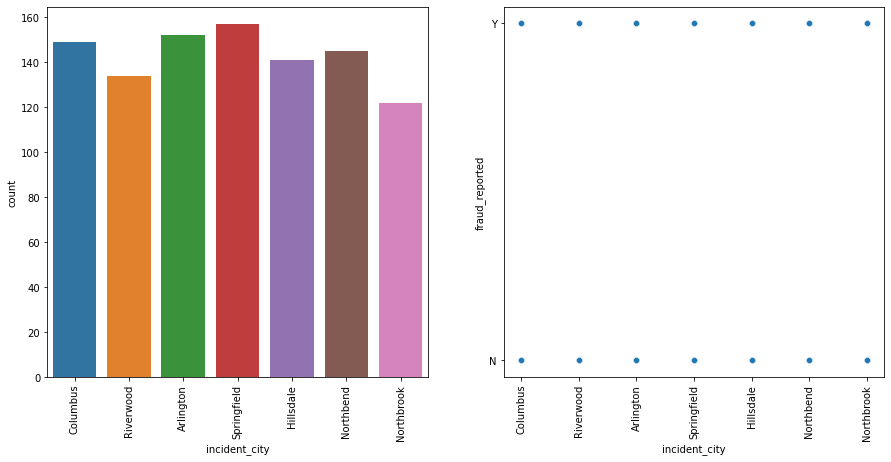

In [66]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['incident_city'])
plt.xlabel('incident_city')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'incident_city', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_city')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of incident_city we conclude that most incident occur in Springfield city from countplot and from scatterplot we conclude that every catregory of incident_city are present in both categories of fraud_reported.

25. incident_location

In [67]:
fraud['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [68]:
ab = []
for i in fraud['incident_location']:
    i = i[-1]
    ab.append(i)

In [69]:
fraud['incident_location'] = pd.Series(ab)

In [70]:
fraud['incident_location'].unique()

array(['e', 'y', 't'], dtype=object)

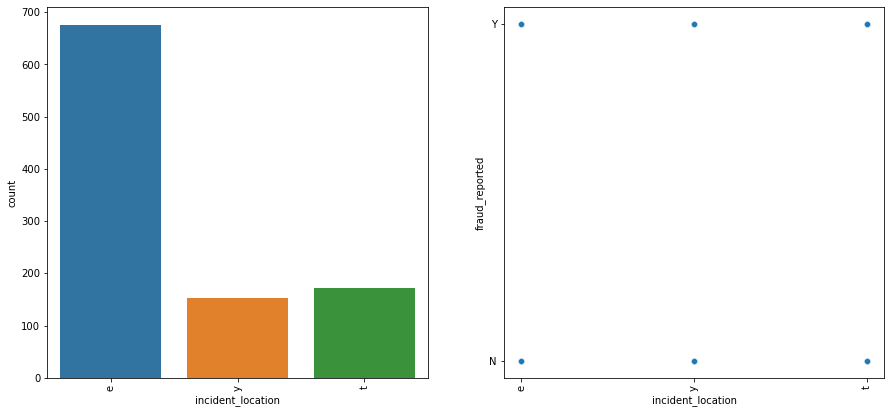

In [71]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['incident_location'])
plt.xlabel('incident_location')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'incident_location', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_location')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of incident_location we conclude that most location have their name end with e from countplot and from scatterplot we conclude that every category of incident_location are present in both categories of fraud_reported.

26. incident_hour_of_the_day

In [72]:
fraud['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

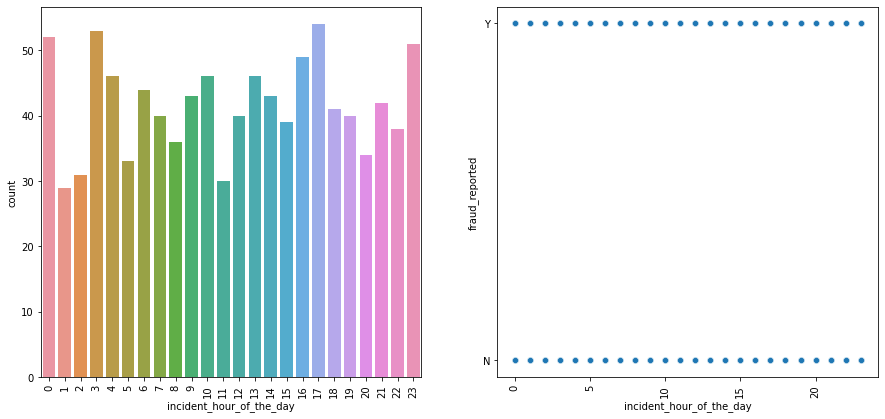

In [73]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['incident_hour_of_the_day'])
plt.xlabel('incident_hour_of_the_day')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'incident_hour_of_the_day', y= 'fraud_reported', data= fraud)
plt.xlabel('incident_hour_of_the_day')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

by looking at both graphs of incident_hour_of_the_day we conclude that most incident occur at 1700 hours from countplot and from scatterplot we conclude that every category of incident_hour_of_the_day are present in both categories of fraud_reported.

27. number_of_vehicles_involved

In [74]:
fraud['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

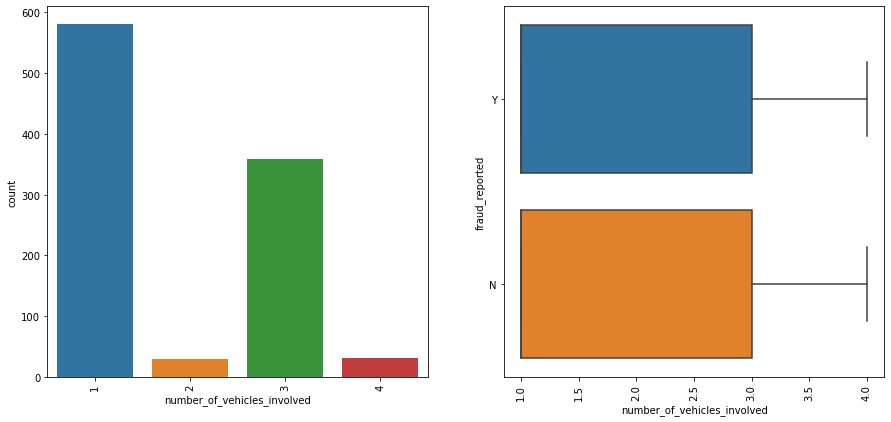

In [75]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['number_of_vehicles_involved'])
plt.xlabel('number_of_vehicles_involved')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'number_of_vehicles_involved', y= 'fraud_reported', data= fraud)
plt.xlabel('number_of_vehicles_involved')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of number_of_vehicles_involved we conclude that most vehicles involved are 1 from countplot and from boxplot we conclude that no outliers of number_of_vehicles_involved are present in any category of fraud_reported.

28. property_damage

In [76]:
fraud['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [77]:
fraud['property_damage'] = fraud['property_damage'].replace(['?', np.nan])

In [79]:
fraud['property_damage'] = fraud['property_damage'].fillna(method= 'bfill')

In [80]:
fraud['property_damage'].isnull().sum()

0

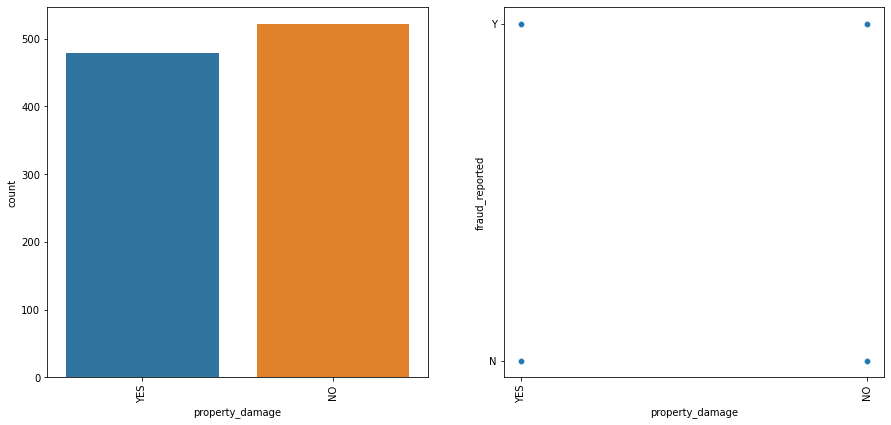

In [81]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['property_damage'])
plt.xlabel('property_damage')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'property_damage', y= 'fraud_reported', data= fraud)
plt.xlabel('property_damage')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of property_damage we conclude that most times there was no property damage from countplot and from scatterplot we conclude that both categories of property_damage are present in both categories of fraud_reported.

29. bodily_injuries

In [82]:
fraud['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

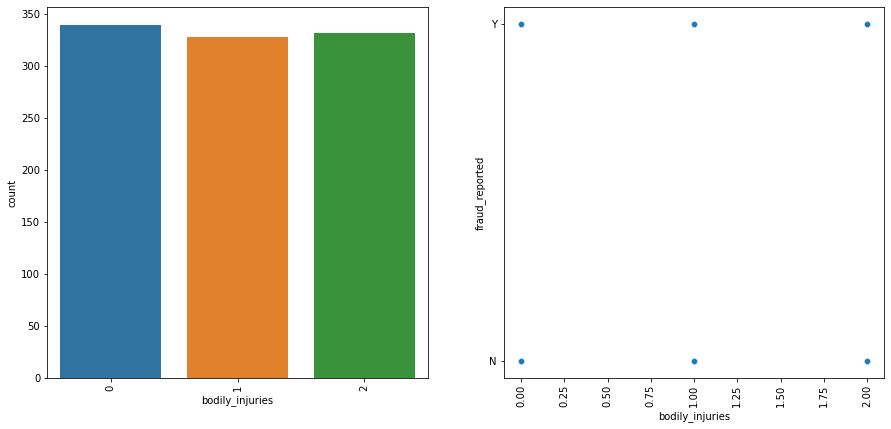

In [83]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['bodily_injuries'])
plt.xlabel('bodily_injuries')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'bodily_injuries', y= 'fraud_reported', data= fraud)
plt.xlabel('bodily_injuries')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By lookking at both graphs of bodily_injuries we conclude that most people left with 0 body injuries from countplot and from scatterplot we conclude that every category of bodily_injuries are present in both categories of fraud_reported.

30. witnesses

In [84]:
fraud['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

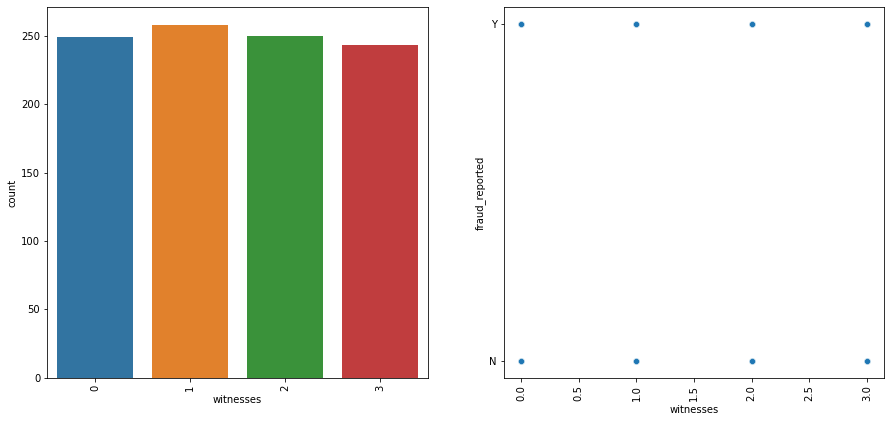

In [85]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['witnesses'])
plt.xlabel('witnesses')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'witnesses', y= 'fraud_reported', data= fraud)
plt.xlabel('witnesses')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of witnesses we conclude that most witnesses present are 1 from countplot and from scatterplot we conclude that every category of witnesses are present in both categories of fraud_reported.

31. police_report_available

In [86]:
fraud['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [87]:
fraud['police_report_available'] = fraud['police_report_available'].replace(['?'], np.nan)

In [88]:
fraud['police_report_available'] = fraud['police_report_available'].fillna(method= 'bfill')

In [89]:
fraud['police_report_available'].isnull().sum()

1

In [90]:
fraud['police_report_available'] = fraud['police_report_available'].fillna(method= 'ffill')

In [91]:
fraud['police_report_available'].isnull().sum()

0

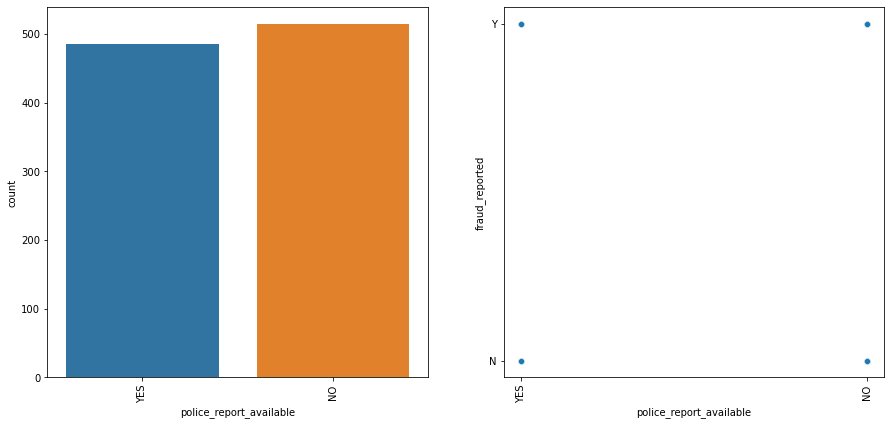

In [92]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['police_report_available'])
plt.xlabel('police_report_available')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'police_report_available', y= 'fraud_reported', data= fraud)
plt.xlabel('police_report_available')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of police_report_available we conclude that for most incidents no police reports were available from countplot and from scatterplot we conclude that both categories of police_report_available are present in both categories of fraud_reported.

32. injury_claim

In [93]:
fraud['injury_claim'].unique()

array([ 6510,   780,  7700,  6340,  1300,  6410, 21450,  9380,  2770,
        4700,  7910, 17680,  4710,  1120,  4200, 10520,  5790, 14160,
        6630,  6040,     0, 17880,  8180,  7080, 16500,  1640,  1040,
        7760, 14100, 12600,  7460,  3310, 14020, 10800, 10620,  6020,
        1230, 12460, 10940,  8000, 16180,  5740,  5680, 11280,  6890,
        6280,   810, 15320, 16360,  1320,   430, 12820,   480, 15780,
         300,  7310, 11440, 15440,  7380,  5630, 11420,  6570, 13720,
       13800,   860, 12420,  6810,  3010,  9520,  9540, 11380, 14900,
       10860,  1240, 14440, 10160,   660,   750,  1180,  5540,  5830,
       11400, 11680,   940, 10300,  8940,   590,  5890, 17040,  1260,
        7210,   900,   700, 15860, 10560,   330, 15580,  6650,  7420,
        7470, 14000, 14740, 14430,  4770,  9320,  6400, 18000, 13240,
       13860, 12760,  8570,  7000,  3300,  5760, 10640,  4970, 14120,
        6150,  8500,  4680, 17360, 13840,   410,  6550, 12260,  9460,
         470,  1890,

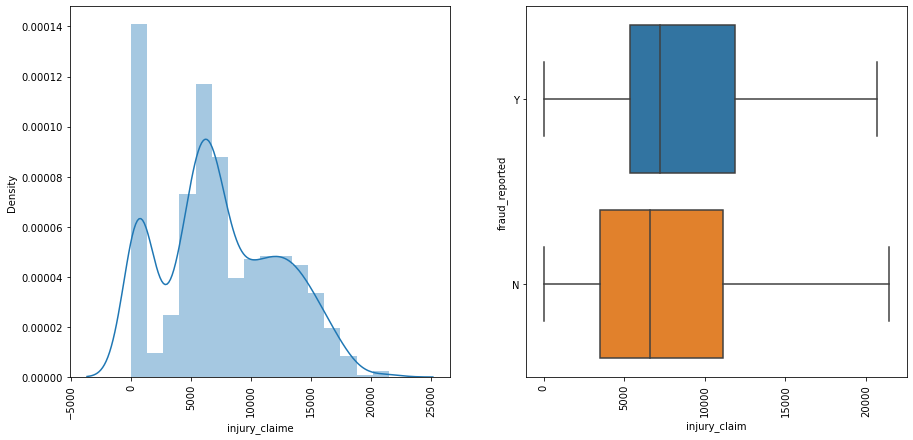

In [94]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['injury_claim'])
plt.xlabel('injury_claime')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'injury_claim', y= 'fraud_reported', data= fraud)
plt.xlabel('injury_claim')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of injury_claim we conclude that data is showing somewhat positive skewness with data having highest density at around 50 from distplot and from boxplot we conclude that no outliers of injury_claim are present in any category of fraud_reported.

33. property_claim

In [95]:
fraud['property_claim'].unique()

array([13020,   780,  3850,  6340,   650,  6410,  7150,  9380,  2770,
        4700, 15820, 17680,  9420,  1120,  8400, 10520,  5790,  7080,
       13260,  6040,  5240,  4730,  5960, 16360, 14160, 11000,   820,
         520, 15520, 14100, 12600,  7460,  3310, 14020,  5400,  5310,
        6020,  6230, 10940,  4000, 16180,  5740,  5680, 11280,     0,
        6280,   810,  7660,  8180,   660,   430, 12820,   480,  7890,
        6270,   300,  7310,  5720,  3690, 11260,  5710,  6570,  6860,
       13800,  3770,   860,  6210,  6810,  4760,  4770,  5690,  7450,
       10860,  1240,  7220, 10160,  1320,  1500,  1180, 11080, 11660,
       11400, 11680,   470,  5640, 10300, 17880,   590, 11780,  8520,
         630,  6630,  7210,   900,   700, 15860,  5280,  3600,   330,
        7790, 19950, 14840, 14940,  7000, 14740,  9620,  9540,  9320,
       12800,  9000,  6620, 13860, 12760,  6160, 17140,  9900,  5760,
       10640,  4970, 14120, 12300,  8500,  9360,  8680,  6920,   410,
        6550, 12260,

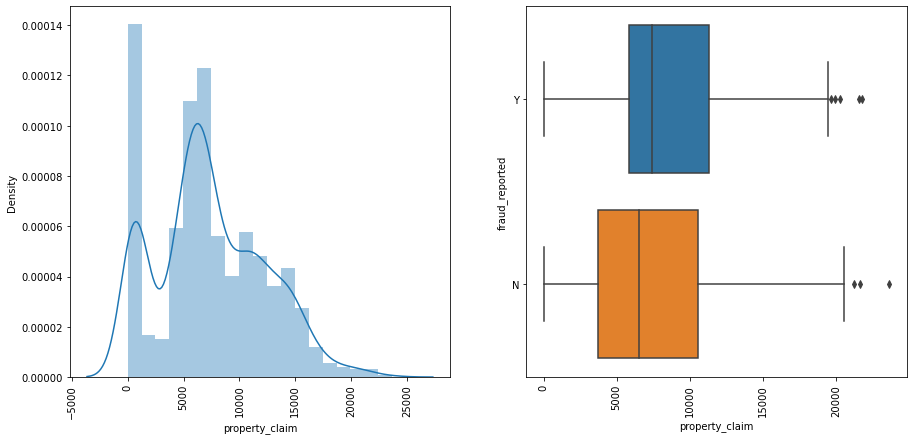

In [96]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['property_claim'])
plt.xlabel('property_claim')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'property_claim', y= 'fraud_reported', data= fraud)
plt.xlabel('property_claim')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of property_claim we conclude that data is showing somewhat positive skewness with having highest density at around 50 from distplot and from boxplot that outliers of property_claim are present in both categories of fraud_reported.

34. vehicle_claim

In [97]:
fraud['vehicle_claim'].unique()

array([52080,  3510, 23100, 50720,  4550, 51280, 50050, 32830, 22160,
       32900, 63280, 79560, 42390,  5040, 33600, 42080, 40530, 56640,
       53040, 48320, 41920, 33110, 47680, 73620, 44000,  6560,  4160,
       46560, 63450, 50400, 52220, 23170, 49070, 48600, 37170, 48160,
        3280, 43610, 38290, 28000, 64720, 40180, 39760, 33840, 48230,
       63090, 50240,  5670, 53620, 57260,  5280,  3440, 44870,  1680,
       55230, 50160,  1800, 51170, 45760, 54040, 33210, 39410, 51390,
       45990, 61740, 62100, 30160, 49840,  2580, 49680, 47670, 27090,
       42840, 28620, 34140, 67050, 38010,  5580, 50540, 30480,  4620,
        5250,  4130, 44320, 40810, 45600, 40880,  3290, 39480, 46350,
       71520,  4720, 53010, 68160, 59670, 50470,  3600,  4200, 47580,
       36960, 25200,  2310, 70110,  3360, 53200, 51940, 48870, 52290,
       49000, 51590, 33670, 33390, 32620, 51200, 63000, 52960, 41580,
       51040, 49280, 51420, 28800,  2970, 42560, 34790, 56480, 43050,
       34000, 32760,

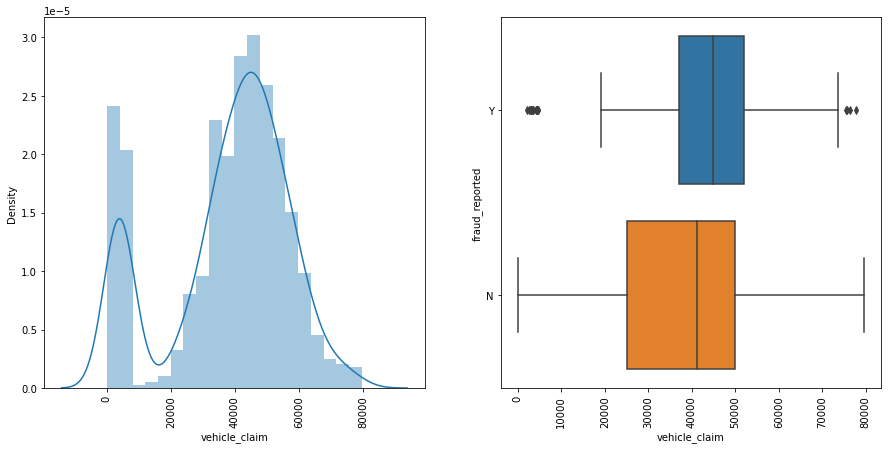

In [98]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(fraud['vehicle_claim'])
plt.xlabel('vehicle_claim')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'vehicle_claim', y= 'fraud_reported', data= fraud)
plt.xlabel('vehicle_claim')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of vehicle_claim we conclude that we cannot determine skewness of data but data is having highest density at around 50000 from distplot and from boxplot we conclude that outliers of vehicle_claim are present in Y category of fraud_reported.

35. auto_make

In [99]:
fraud['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

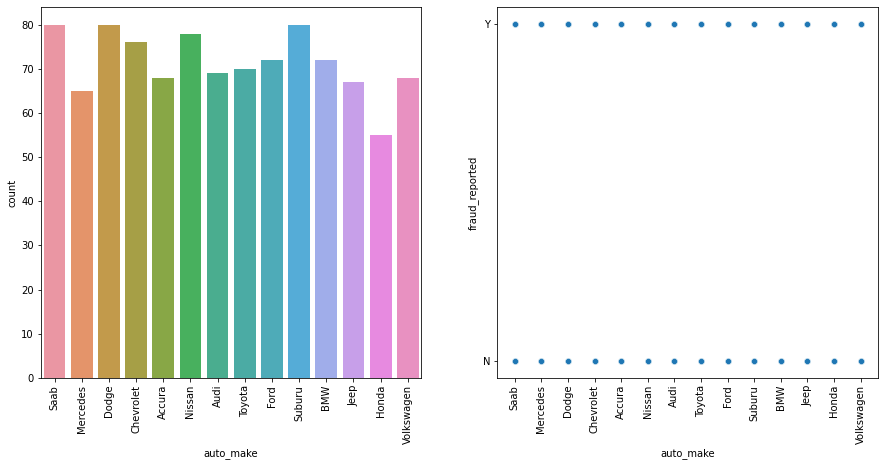

In [100]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['auto_make'])
plt.xlabel('auto_make')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'auto_make', y= 'fraud_reported', data= fraud)
plt.xlabel('auto_make')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

by looking at both graphs of auto_make we conclude that most cars were sold of Saab, Dodge and Suburu brands from countplot and from scatterplot we conclude that every category of auto_make are present in both categories of fraud_reported.

36. auto_model

In [101]:
fraud['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

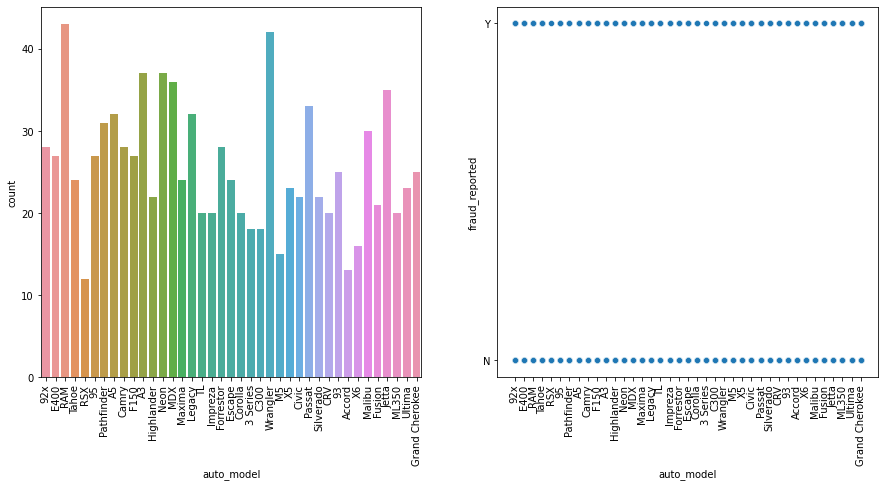

In [102]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['auto_model'])
plt.xlabel('auto_model')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'auto_model', y= 'fraud_reported', data= fraud)
plt.xlabel('auto_model')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of auto_model we conclude that most cars used are of E400 model from countplot and from scatterplot we conclude that every category of auto_model are present in both categories of fraud_reported.

37. auto_year

In [103]:
fraud['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

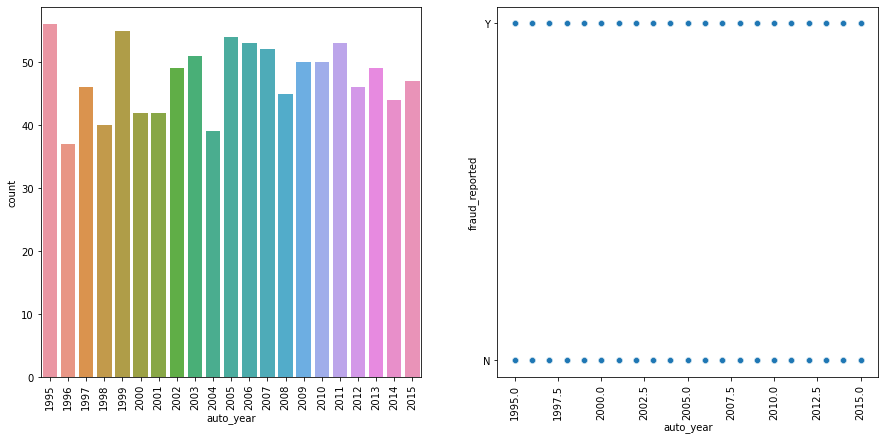

In [104]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(fraud['auto_year'])
plt.xlabel('auto_year')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'auto_year', y= 'fraud_reported', data= fraud)
plt.xlabel('auto_year')
plt.xticks(rotation= 90)
plt.ylabel('fraud_reported')
plt.show()

By looking at both graphs of auto_year we conclude that most cars are of year 1995 that are involved in incident from countplot and from scatterplot we conclude that every category of auto_year are present in both categories of fraud_reported.

#### Now lets change data types of every column to int or float data type.

In [105]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int64  
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [106]:
fraud['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [107]:
fraud['policy_state'] = fraud['policy_state'].replace(['OH', 'IN', 'IL'],[0,1,2])

In [108]:
fraud['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [109]:
fraud['policy_csl'] = fraud['policy_csl'].replace(['250/500', '100/300', '500/1000'],[0,1,2])

In [110]:
fraud['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [111]:
fraud['insured_sex'] = fraud['insured_sex'].replace(['MALE', 'FEMALE'],[0,1])

In [112]:
fraud['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [113]:
fraud['insured_education_level'] = fraud['insured_education_level'].replace(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
                                                                             'JD'], np.arange(0,7))

In [116]:
fraud['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [117]:
fraud['insured_occupation'] = fraud['insured_occupation'].replace(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
                                                                   'tech-support', 'prof-specialty', 'other-service',
                                                                   'priv-house-serv', 'exec-managerial', 'protective-serv',
                                                                   'transport-moving', 'handlers-cleaners', 'adm-clerical',
                                                                   'farming-fishing'], np.arange(0,14))

In [120]:
fraud['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [121]:
fraud['insured_hobbies'] = fraud['insured_hobbies'].replace(['sleeping', 'reading', 'board-games', 'bungie-jumping',
                                                             'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
                                                             'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
                                                             'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
                                                            np.arange(0,20))

In [122]:
fraud['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [123]:
fraud['insured_relationship'] = fraud['insured_relationship'].replace(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
                                                                       'not-in-family'], np.arange(0,6))

In [124]:
fraud['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [125]:
fraud['incident_type'] = fraud['incident_type'].replace(['Single Vehicle Collision', 'Vehicle Theft',
                                                         'Multi-vehicle Collision', 'Parked Car'], np.arange(0,4))

In [126]:
fraud['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [127]:
fraud['collision_type'] = fraud['collision_type'].replace(['Side Collision', 'Rear Collision', 'Front Collision'],
                                                         np.arange(0,3))

In [129]:
fraud['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [130]:
fraud['incident_severity'] = fraud['incident_severity'].replace(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
                                                               [0,1,2,3])

In [132]:
fraud['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [133]:
fraud['authorities_contacted'] = fraud['authorities_contacted'].replace(['Police', 'None', 'Fire', 'Other', 'Ambulance'],
                                                                        [0,1,2,3,4])

In [134]:
fraud['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [135]:
fraud['incident_state'] = fraud['incident_state'].replace(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], np.arange(0,7))

In [136]:
fraud['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [137]:
fraud['incident_city'] = fraud['incident_city'].replace(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
                                                         'Northbend', 'Northbrook'], np.arange(0,7))

In [138]:
fraud['incident_location'].unique()

array(['e', 'y', 't'], dtype=object)

In [139]:
fraud['incident_location'] = fraud['incident_location'].replace(['e', 'y', 't'],[0,1,2])

In [140]:
fraud['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [142]:
fraud['property_damage'] = fraud['property_damage'].replace(['YES','NO'],[0,1])

In [143]:
fraud['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [144]:
fraud['police_report_available'] = fraud['police_report_available'].replace(['YES','NO'],[0,1])

In [147]:
fraud['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [148]:
fraud['auto_make'] = fraud['auto_make'].replace(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
                                                 'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
                                                 'Volkswagen'], np.arange(0,14))

In [151]:
fraud['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [152]:
fraud['auto_model'] = fraud['auto_model'].replace(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
                                                   'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
                                                   'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
                                                   '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
                                                   'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
                                                   'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], np.arange(0,39))

In [153]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int64  
 4   policy_state                 1000 non-null   int64  
 5   policy_csl                   1000 non-null   int64  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int64  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

#### Now lets create heatmap to check for correlations

In [154]:
fraud['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [155]:
fraud['fraud_reported'] = fraud['fraud_reported'].replace(['Y','N'],[1,0])

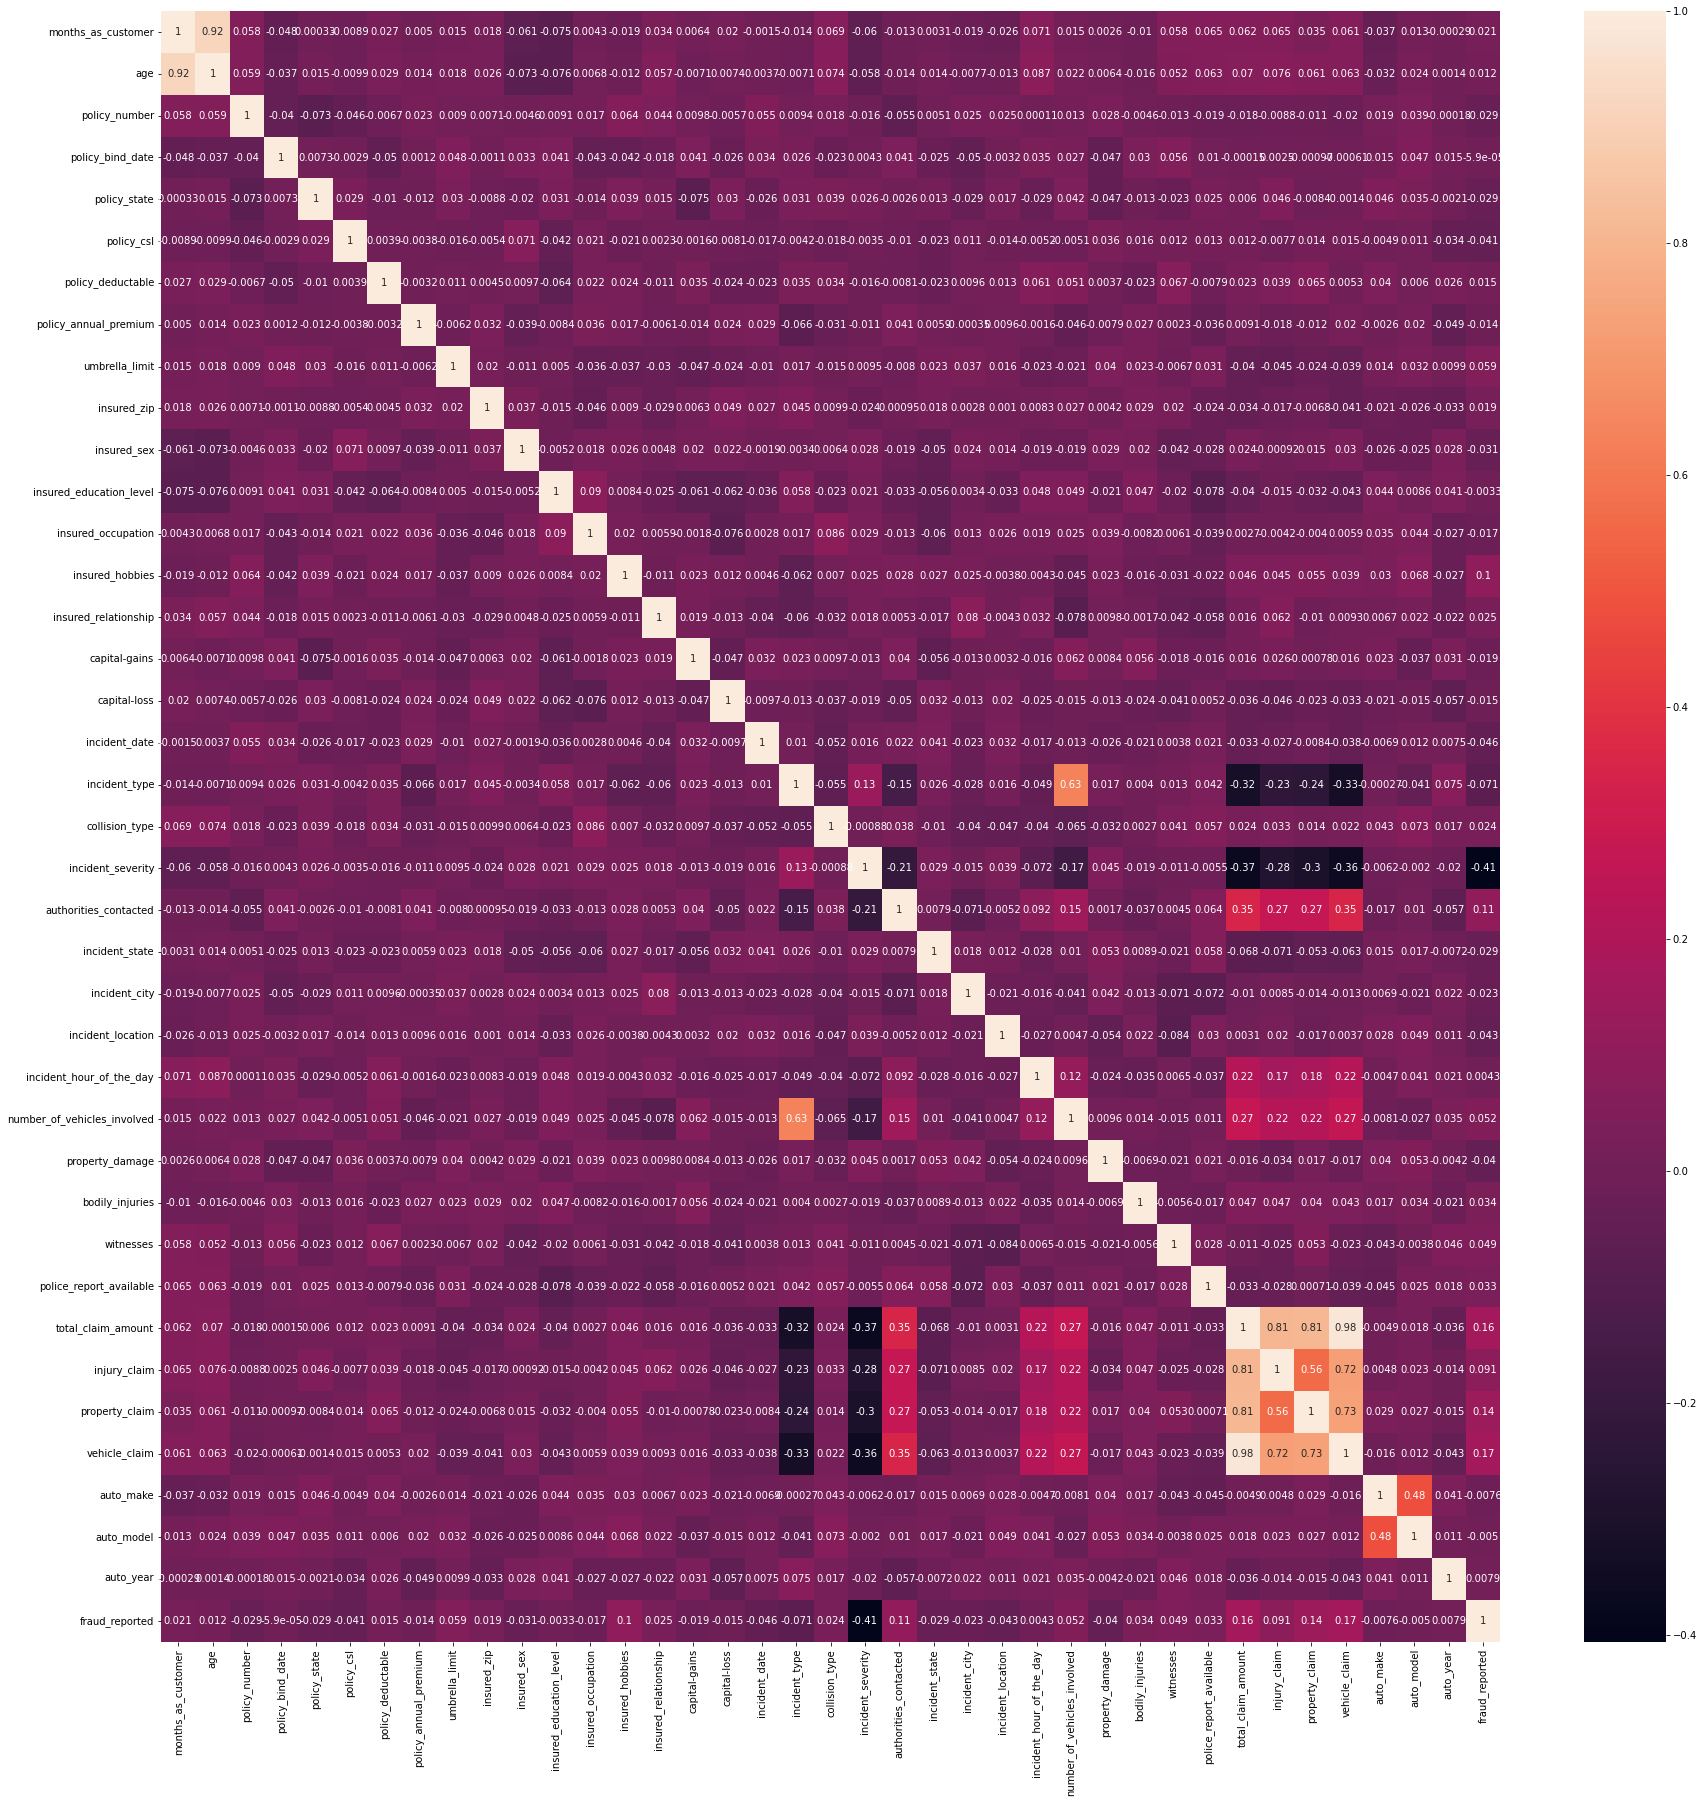

In [158]:
plt.figure(figsize= [30,30])
sns.heatmap(fraud.corr(), annot= True)
plt.show()

from heatmap we conclude that target column is having high positive correlation with following columns (insured_hobbies, authorities_contacted, total_claim_amount, property_claim and vehicle_claim) and is having high negative correlation with following columns (incident_severity). We can drop following column to reduce multicollinearity (incident_hour_of_the_day, number_of_vehicles_involved, incident_type and auto_make).

In [159]:
fraud.drop(['incident_hour_of_the_day', 'number_of_vehicles_involved', 'incident_type', 'auto_make'], axis= 1, inplace= True)

In [160]:
fraud['fraud_reported'] = fraud['fraud_reported'].replace([1,0],['Y','N'])

#### Now checking performance of various models on dataset to find best suited model for dataset.

In [161]:
X = fraud.drop(['fraud_reported'], axis= 1)
y = fraud['fraud_reported']

1. Logistic Regression Model

In [162]:
lr = LogisticRegression()
lrf = GridSearchCV(lr, param_grid= {'C': [1,2,3,4,5]}, scoring= 'accuracy', cv= 5)
scaler= StandardScaler()

In [163]:
trainaccuracy = []
testaccuracy = []
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    lrf.fit(scaledX_train, y_train)
    trainaccuracy.append(lrf.score(scaledX_train, y_train))
    testaccuracy.append(lrf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8009333333333333
test accuracy :  0.7756000000000001


2. Decision Tree Classification model

In [164]:
dt = DecisionTreeClassifier(criterion= 'entropy')
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'accuracy', cv= 5)

In [165]:
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    dtf.fit(scaledX_train, y_train)
    trainaccuracy.append(dtf.score(scaledX_train, y_train))
    testaccuracy.append(dtf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8402333333333333
test accuracy :  0.8056999999999999


3. Random Forest Classification model

In [166]:
rf = RandomForestClassifier(criterion= 'entropy')
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'accuracy', cv= 5)

In [167]:
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    rff.fit(scaledX_train, y_train)
    trainaccuracy.append(rff.score(scaledX_train, y_train))
    testaccuracy.append(rff.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8412222222222222
test accuracy :  0.7871333333333334


4. Bagging Classification model

In [168]:
bc = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy'))
bcf = GridSearchCV(bc, param_grid= {'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [169]:
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    bcf.fit(scaledX_train, y_train)
    trainaccuracy.append(bcf.score(scaledX_train, y_train))
    testaccuracy.append(bcf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8176833333333333
test accuracy :  0.77695


5. Support Vector Classification model

In [170]:
sv = SVC()
svf = GridSearchCV(sv, param_grid= {'kernel': ['rbf', 'linear'], 'C': [1,2,3,4,5]},
                  scoring= 'accuracy', cv= 5)

In [171]:
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    scaledX_train = scaler.fit_transform(X_train)
    scaledX_test = scaler.transform(X_test)
    svf.fit(scaledX_train, y_train)
    trainaccuracy.append(svf.score(scaledX_train, y_train))
    testaccuracy.append(svf.score(scaledX_test, y_test))
print('train accuracy : ', np.mean(trainaccuracy))
print('test accuracy : ', np.mean(testaccuracy))

train accuracy :  0.8204399999999998
test accuracy :  0.7768400000000003


#### By looking at all the models we conclude that Decision Tree classification model is giving best test score for the dataset.

In [172]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [173]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 2, min_samples_split= 5)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 181)

#### Now scaling the data to remove any outliers present in it.

In [176]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

#### Applying model on dataset.

In [177]:
pred = dtc.fit(scaledX_train, y_train).predict(scaledX_test)

In [178]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': pred})
df.head()

,Actual,Prediction
498,Y,Y
34,N,N
816,N,N
355,N,N
491,N,N


#### Now checking performance of model through various metrices

In [179]:
print('accuracy score : ', metrics.accuracy_score(y_test, pred))

accuracy score :  0.884


In [180]:
print('confusion matrix : ')
metrics.confusion_matrix(y_test, pred)

confusion matrix : 


array([[176,  18],
       [ 11,  45]], dtype=int64)

In [181]:
print('cohen kappa score : ', metrics.cohen_kappa_score(y_test, pred))

cohen kappa score :  0.6805322992861549


#### So by looking at the scores of various metrices of model we can conclude that model is working quite well on dataset. Sp now we can save the model.

In [191]:
save_dt = pickle.dumps(dtc)

#### Hence we have made the prediction on dataset using Decision Tree classification model and also saved the model. So we have achieved objective of task.